# Lab 2 – Linear Regression
## PART 1 Univariable Linear Regression

Objectives: Implement linear regression with one variable (feature) and get to see it works on data. 

In this part of the lab work you will implement Univariate Linear Regression to predict profits for a food truck (a large vehicle equipped to cook and sell food). Suppose you are the CEO of a restaurant franchise and consider different cities for opening a new food truck. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select in which city to expand your business.

First, import all relevant libraries. 

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load and Plot the Data

The file *Uni_linear.txt* contains the dataset for the Linear Regression problem. The first column is the population of a city (variable X) and the second column is the profit of a food truck in that city (variable y). The values are scaled: number of people/10000 and profit in dolars/10000. A negative value for profit indicates a loss. 


<img src="images/f1.png" style="width:350px;height:250px;">
<caption><center> **Fig. 1** : **file Uni_linear.txt** </center></caption>

 

SyntaxError: invalid syntax (3860283019.py, line 3)

In [19]:
#Load data into the variable **data** (using function pd.read_csv from panda library).

data=pd.read_csv("Uni_linear.txt", ",")


/var/folders/x0/xnkbdr9x6dsd5q67zbz_f7jw0000gn/T/ipykernel_60904/1052774137.py:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data=pd.read_csv("Uni_linear.txt", ",")


In [20]:
#a few examples from the dataset 
data.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [21]:
#Some statistics
data.describe()


,6.1101,17.592
count,96.000000,96.000000
mean,8.181151,5.716709
std,3.884451,5.404947
min,5.026900,-2.680700
25%,5.690950,1.952550
50%,6.735950,4.455300
75%,8.639925,6.879150
max,22.203000,24.147000


In [6]:
#Create Fig. 1  (using plt.scatter)


#Add labels : plt.xlabel; plt.ylabel; plt.title



### Compute the Cost Function $J(\theta)$

Linear Regression cost function: $J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$

Linear regression model: $h_\theta(x)=\theta^Tx=\theta_0+\theta_1x_1$ 

Complete the function **computeCost(X,y,theta)**.  Variables X and y are not scalar values, X is an array (matrix) with dimension (*mx2*), y is an array (vector) with dimension (*mx1*), *m* rows represent the examples from the training set.


In [22]:
def computeCost(X,y,theta):
    """
   Take the arrays X, y, theta and return cost function J for this theta. 

    """
    # number of training examples
    m= len(X)
    
    # Use the vectorized dot product with function np.dot() to compute the linear regression model
    h= np.dot(X, theta)

    #Implement the formula above to compute cost function. 
    #Use function np.sum() to compute the sum of errors over all examples. 
    J= 1/(2*m) * np.sum(np.square(h - y))
    
    return J

Check if function **computeCost()** was correctly implemented. 


In [46]:
# extract only the values of the two columns from dataFrame data
data_n = data.values 

# Extract X and y 
#Check the shape of X and y, if they are rank 1 arrays (m,), reshape them to be 2-dimensonal arrays (m,1).  
#Each example is stored as a row.  
X = data.values[:, 0].reshape(-1, 1)
y = data.values[:, 1].reshape(-1, 1)

# To take into account the intercept term theta_0, add an additional first column to X and 
# set it to all ones (use function np.ones). 
X = np.append(np.ones((len(X),1)), X, axis=1) 

#Initialize vector theta to 0 (use function np.zeros)
theta = np.zeros((2,1))

# Call function computeCost()
computeCost(X, y, theta)

# ANSWER: You should see a cost of about 32.07.

[[ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]
 [ 7.6366]

30.79495785534583

### Gradient Descent

Minimize the cost function $J(\theta)$ by updating Equation        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$) and repeat unitil convergence. 


Complete function **gradientDescent**.

In [24]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take arrays X, y and theta and update theta over num_iters steps with learning rate alpha
    
     Return: final vector theta and the values of the cost function for each iteration (J_history) 
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        
        #compute the linear regression model
        h = np.dot(X, theta)
        
        #Vectorized way to compute all gradients simultaneously 
        grad = np.dot(X.transpose(),(h-y))/m 
        
        # updates of vector theta for each iteration
        theta = theta - (alpha * grad)
        
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

Run  **gradientDescent** with learning rate alpha= 0.01 and 1500 iterations and get the final parameters $\theta_0$ = -3.630, $\theta_1$=1.166. 

In [54]:
theta,J_history = gradientDescent(X, y, theta, 0.01, 1500)
#The final Linear Regression model with optimized parameters theta

print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.93 + 1.18x1


### Visualising the Cost Function $J(\theta)$ 
To understand the cost function $J(\theta)$ better, we plot the cost in a 3D graph over a grid of values for $\theta_0$ and $\theta_1$. The cost function has a global minimum. This minimum is the optimal point for $\theta_0$ and $\theta_1$ and each step of gradient descent moves closer to this point.

In [55]:
from mpl_toolkits.mplot3d import Axes3D

In [56]:
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

Text(0.5, 0, '$J(\\Theta)$')

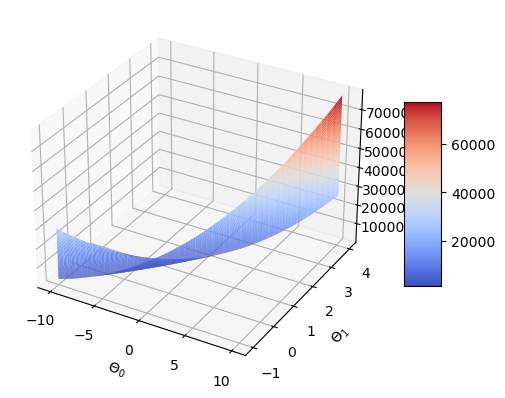

In [57]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")


In [14]:
### Testing the implementation

A good way to verify that gradient descent optimization is working correctly is
to plot $J(\theta)$ over the iterations. Function **gradientDescent** calls function **computeCost** on 
every iteration and saves the costs over the iterations. If the algorithm works properly, $J(\theta)$ shoul
d never increase, and should converge to a steady value (as shown in Fig.2). 

<img src="images/f2.png" style="width:350px;height:250px;">
<caption><center> Fig.2 </center></caption>



SyntaxError: invalid syntax (2924471426.py, line 3)

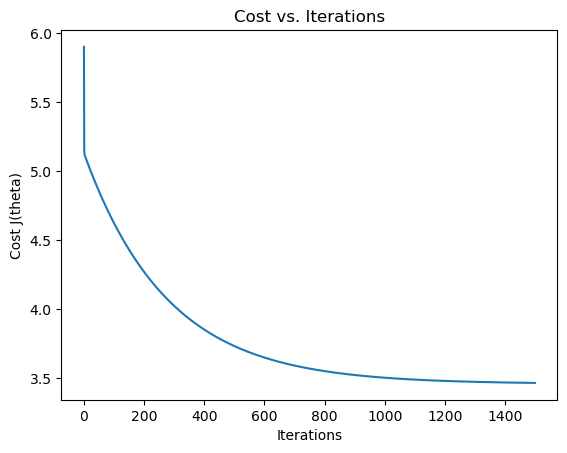

In [58]:
#Plot the gradient history, use function plt.plot(),  and get a curve similar to Fig.2. 

# Plot the cost over iterations
plt.plot(range(1500), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost J(theta)')
plt.title('Cost vs. Iterations')
plt.show()

#Add labels : plt.xlabel; plt.ylabel; plt.title

### Graph with Best Line Fit 

Plot data and the best line fit (with the optimized  $\theta$ values) as shown in Fig.3. 

<img src="images/f3.png" style="width:350px;height:250px;">
<caption><center> Fig. 3 </center></caption>

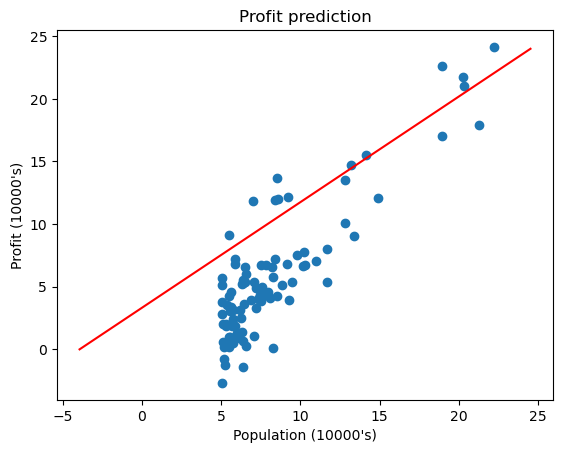

In [59]:
#plot data
plt.scatter(data_n[:,0], data_n[:, 1])

#add the best line fit with red colour
x_fit=range(25)
y_fit=theta[0]+theta[1]*x_fit
plt.xlabel("Population (10000's)")
plt.ylabel("Profit (10000's)")
plt.title("Profit prediction")

plt.plot(y_fit, x_fit, "r")

#Add labels : plt.xlabel; plt.ylabel; plt.title


### Make predictions  using the optimized $\theta$ values

Complete function **predict()** to compute model predictions.


In [61]:
def predict(x,theta):
    """
    Takes array of x and theta and return the predicted value of y 
    """
     #compute the linear regression model
    h = np.dot(X, theta)
    
    return h

In [34]:
Run  **predict** to predict profits in areas of 35,000 and 70,000 people. 
Note that you need to scale the numbers properly !

Answer: 

        For population = 35,000, predicted profit of 4520 USD

        For population = 70,000, predicted profit of 45342 USD

SyntaxError: invalid syntax (1161148026.py, line 1)

In [68]:
# Population values for prediction
population_1 = 35
population_2 = 70

# Prepare feature vectors for prediction, including the bias term (1)
x_predict_1 = np.array([1, population_1])
x_predict_2 = np.array([1, population_2])
# Use the predict function to make predictions
predicted_profit_1 = predict(x_predict_1, theta)
predicted_profit_2 = predict(x_predict_2, theta)

# Print or use the predicted profits
print("Predicted Profit for 35,000 Population:", predicted_profit_1)
print("Predicted Profit for 70,000 Population:", predicted_profit_2)


Predicted Profit for 35,000 Population: [[ 2.62386174]
 [ 6.16806538]
 [ 4.3723229 ]
 [ 3.01739881]
 [ 6.00726147]
 [ 4.93306286]
 [ 6.23857263]
 [ 3.75968012]
 [ 2.06324027]
 [ 2.84071595]
 [12.85784012]
 [ 2.86832635]
 [ 6.03747886]
 [ 2.75776625]
 [ 2.44812688]
 [ 3.61653264]
 [ 2.15270745]
 [ 3.69260936]
 [ 4.45242861]
 [ 3.4076179 ]
 [20.09342388]
 [ 2.5793059 ]
 [ 3.56996231]
 [ 2.66794358]
 [18.52330458]
 [11.27468586]
 [ 9.05755891]
 [11.68706437]
 [22.38402057]
 [ 2.29763242]
 [ 3.88197168]
 [ 7.03263825]
 [ 3.05531867]
 [ 5.80367921]
 [ 5.4746059 ]
 [ 5.6671677 ]
 [ 2.7170024 ]
 [11.28416583]
 [ 3.60231269]
 [ 2.48071426]
 [ 4.22929392]
 [ 9.94749068]
 [ 2.91537068]
 [ 5.34579687]
 [ 4.47885401]
 [ 2.0817262 ]
 [ 2.94819506]
 [ 9.93801071]
 [ 2.64033318]
 [ 5.00866559]
 [ 2.36316268]
 [ 4.87085059]
 [ 5.08320182]
 [ 3.57790178]
 [ 3.60883017]
 [ 3.50846103]
 [ 2.75658126]
 [ 7.10610798]
 [ 7.27603637]
 [ 6.53162207]
 [ 2.21100924]
 [21.28908454]
 [13.73947693]
 [18.53989452]


In [32]:
predict2= predict(X, theta)
print("For population = 70,000, what is the predicted profit in $ ?")
print(predict2[70])

For population = 70,000, what is the predicted profit in $ ?
[4.76491197]


##  PART 2 Multivariable Linear Regression

**Objectives**: Implement linear regression with multiple variables (features) and get to see it works on data. 

Now you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file **Multi_linear.txt** contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.  

Load the data into dataframe data2. 

In [39]:
data2= pd.read_csv("Multi_linear.txt")

In [40]:
#a few examples from the dataset 
data2.head()

,2104,3,399900
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900


In [41]:
#Some statistics
data2.describe()

,2104,3,399900
count,46.000000,46.000000,46.000000
mean,1998.434783,3.173913,339119.456522
std,803.333019,0.768963,126103.418369
min,852.000000,1.000000,169900.000000
25%,1429.500000,3.000000,249900.000000
50%,1870.000000,3.000000,299900.000000
75%,2284.500000,4.000000,368875.000000
max,4478.000000,5.000000,699900.000000


### Feature Normalization

Note that house sizes are much larger values (about 1000 times) than the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. 
To make sure features are on a similar scale apply Mean normalization.

$x_i = \frac{x_i - \mu_i}{\sigma_i}$

Complete function **featureNormalization(X)**:

• Compute the mean value  $\mu_i$ of each feature (use function np.mean(X,axis=0)) 

• compute the standard deviation $\sigma_i$ of each feature (use function np.std(X,axis=0)) 

• Apply the equation above.

**Remark:** When normalizing the features, it is important to store the mean value and the standard deviation used for normalization. After optimizing the trainable parameters of the model (thetas), you want to predict the price of a new example not seen before.
You must first normalize the features of that new example using the mean and standard deviation previously computed from the training set.

**Remark:** Mean normalization is an alternative to normalizing by making the absolute values < 1 (i.e. dividing by MaxValue-MinValue).

In [42]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    #Compute the mean value 
    mean = np.mean(X, axis = 0)
    
    # compute the standard deviation  
    std = np.std(X, axis = 0)
    
    # apply Mean normalization
    X_norm = (X - mean) / std
    
    return X_norm , mean , std

Extract from data2 the features in X2 and the output in y2. If rank 1, reshape them to have 2 dimensions. 

In [49]:
data_n2=data2.values

#Extract from data2 the features in X2 and the output in y2
#Check their shapes, if rank 1, reshape to have 2 dimensions
X2 = data_n2[:, 0:2]
y2 = np.append(data_n2[:, 2].reshape(-1, 1), np.zeros((len(data_n2),1)), axis = 1)
print(y2)
#Run featureNormalization to normalize X2, store the means and stds.
X2, mean_X2, std_X2 = featureNormalization(X2)

#After normalizing the features add an extra column of 1's corresponding to x0 = 1. 

X2=np.append(np.ones((len(X2), 1)), X2, axis = 1)

#Inicialize the vector of model parameters theta2 to zeros
theta2 = np.zeros((3,1)) 

[[329900.      0.]
 [369000.      0.]
 [232000.      0.]
 [539900.      0.]
 [299900.      0.]
 [314900.      0.]
 [198999.      0.]
 [212000.      0.]
 [242500.      0.]
 [239999.      0.]
 [347000.      0.]
 [329999.      0.]
 [699900.      0.]
 [259900.      0.]
 [449900.      0.]
 [299900.      0.]
 [199900.      0.]
 [499998.      0.]
 [599000.      0.]
 [252900.      0.]
 [255000.      0.]
 [242900.      0.]
 [259900.      0.]
 [573900.      0.]
 [249900.      0.]
 [464500.      0.]
 [469000.      0.]
 [475000.      0.]
 [299900.      0.]
 [349900.      0.]
 [169900.      0.]
 [314900.      0.]
 [579900.      0.]
 [285900.      0.]
 [249900.      0.]
 [229900.      0.]
 [345000.      0.]
 [549000.      0.]
 [287000.      0.]
 [368500.      0.]
 [329900.      0.]
 [314000.      0.]
 [299000.      0.]
 [179900.      0.]
 [299900.      0.]
 [239500.      0.]]


### Compute Cost $J(\theta)$
In the previous (univariate) problem you implemented functions **computeCost()** and **gradientDescent()** in a vectorized way, therefore they will work for linear regression with any number of features. 

In [50]:
#Call function computeCost() for the present data

computeCost(X2, y2, theta2)

# Answer: Cost = 65591548106.46

65279190347.902176

### Gradient Descent



Apply **gradientDescent** with different learning rates (e.g. alpha=[0.001, 0.01, 0.1, 0.3 1.4]) and 400 iterations.

You may need to adjust the number of iterations in order to see well the overall trend in $J(\theta)$ curve below.  

In [68]:
#Inicialize vector theta2 to zeros
initial_theta2= np.zeros((3,1))
theta2, J_history2 = gradientDescent(X2,y2,initial_theta2,0.001,800)

#The final Linear Regression model with optimized parameters theta
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =186804.24 + 54356.5x1 + 19857.23x2


### Visualising the Cost Function $J(\theta)$

If the learning rate is too small (e.g. 0.001), the gradient descent takes a very long time to converge to the optimal value. 

If the learning rate is too large (e.g. 1.4), $J(\theta)$ can diverge and "blow up", resulting in values which are too large for computer calculations. In these situations, Python will return nan (not a number). This is often caused by undefined operations that involve +/- infinity.

Get a similar plot as in Fig.4. 

<img src="images/f4.png" style="width:350px;height:250px;">
<caption><center> Fig. 4 </center></caption>

In [1]:
theta3, J_history3 = gradientDescent(X2,y2,initial_theta2,0.01,800)
theta4, J_history4 = gradientDescent(X2,y2,initial_theta2,0.1,800)
theta5, J_history5 = gradientDescent(X2,y2,initial_theta2,0.3,800)
theta6, J_history6 = gradientDescent(X2,y2,initial_theta2,1.4,800)

plt.plot(range(800), J_history2)
plt.plot(range(800), J_history3)
plt.plot(range(800), J_history4)
#plt.plot(range(800), J_history5)
#plt.plot(range(800), J_history6)
plt.xlabel("Iteration")
plt.ylabel("J(theta)")
plt.title("Cost function using Gradient descent for different learning rates")
plt.show()


NameError: name 'gradientDescent' is not defined

### Make predictions using the optimized $\theta$ values

Using the best learning rate you found, run gradient descent until convergence to find the optimal $\theta$ values.


In [ ]:
# Predict the price of a house with 1650 square feet and 3 bedrooms  
x_sample = ?

#feature normalisation of x_sample
x_sample= 

#add 1
x_sample=


predict3=predict(?,?)

print("For size of house = 1650, Number of bedroom = 3, what is the predicted house price in of $ ?")

# Answer: the price is about $293000.0